<a href="https://colab.research.google.com/github/manikanta741/datamining/blob/main/exp3dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 238ms/step - accuracy: 0.2186 - loss: 3.4207 - val_accuracy: 0.5868 - val_loss: 2.0681
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.5053 - loss: 2.1628 - val_accuracy: 0.6394 - val_loss: 1.5994
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.5912 - loss: 1.7310 - val_accuracy: 0.6745 - val_loss: 1.4372
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6419 - loss: 1.4995 - val_accuracy: 0.6830 - val_loss: 1.3511
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.6638 - loss: 1.4063 - val_accuracy: 0.6995 - val_loss: 1.2771
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.6855 - loss: 1.2833 - val_accuracy: 0.7044 - val_loss: 1.2268
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7139 - loss: 1.1810 - val_accuracy: 0.7271 - val_loss: 1.1824
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.7156 - loss: 1.1483 - val_accuracy: 0.7297 -

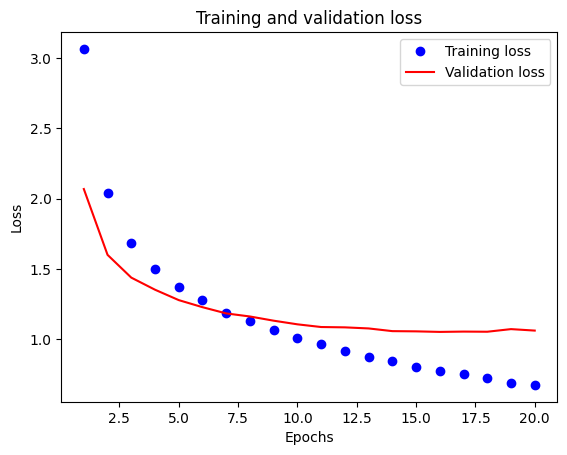

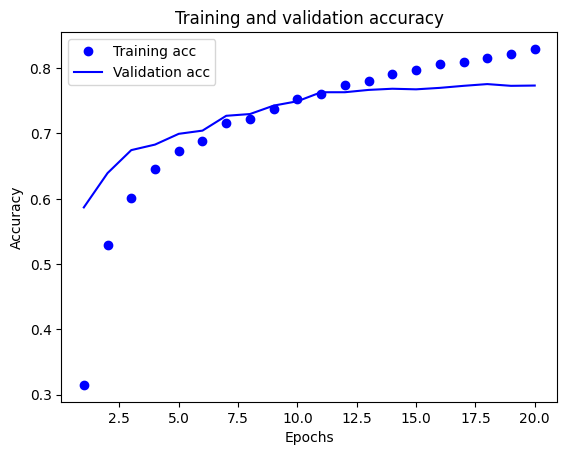

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Confusion Matrix:
 [[ 6  3  0 ...  0  0  0]
 [ 0 89  0 ...  0  0  0]
 [ 0  3 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  1  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.50      0.63        12
           1       0.61      0.85      0.71       105
           2       0.65      0.55      0.59        20
           3       0.91      0.95      0.93       813
           4       0.81      0.88      0.85       474
           5       0.00      0.00      0.00         5
           6       1.00      0.29      0.44        14
           7       0.00      0.00      0.00         3
           8       0.67      0.63      0.65        38
           9       0.81      0.68      0.74        25
          10       0.63      0.87      0.73        30
          11       0.57      0.81      0.67        83
          12       0.00      0.00      0.00        13
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(x_train)
x_test = vectorize_sequences(x_test)

num_classes = max(y_train) + 1
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, batch_size=512, validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:\n", conf_matrix)

report = classification_report(y_true_classes, y_pred_classes)
print("Classification Report:\n", report)
